In [42]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
climate = pd.read_csv("~/Desktop/data.csv")
climate.head()

,STATION,NAME,DATE,CDSD,DSND,DSNW,EMNT,EMSD,EMSN,EMXP,EMXT,HDSD,PRCP,SNOW,TAVG,TMAX,TMIN
0,USC00025467,"MESA, AZ US",1896-03,NaN,0.0,0.0,1.1,0.0,0.0,9.9,35.0,NaN,11.7,0.0,16.7,24.9,8.4
1,USC00025467,"MESA, AZ US",1896-04,NaN,0.0,0.0,4.4,0.0,0.0,0.8,35.6,NaN,0.8,0.0,18.3,28.0,8.7
2,USC00025467,"MESA, AZ US",1896-06,NaN,0.0,0.0,15.6,0.0,0.0,0.0,46.7,NaN,0.0,0.0,31.2,41.9,20.5
3,USC00025467,"MESA, AZ US",1896-07,NaN,0.0,0.0,12.2,0.0,0.0,22.9,43.3,0.0,86.5,0.0,28.6,38.4,18.8
4,USC00025467,"MESA, AZ US",1896-08,NaN,0.0,0.0,16.1,0.0,0.0,2.3,43.3,0.0,6.7,0.0,29.9,37.1,22.8


In [44]:
climate['YEAR'] = climate['DATE'].str.slice(0, 4)

In [45]:
climate.tail()

,STATION,NAME,DATE,CDSD,DSND,DSNW,EMNT,EMSD,EMSN,EMXP,EMXT,HDSD,PRCP,SNOW,TAVG,TMAX,TMIN,YEAR
1416,USC00025467,"MESA, AZ US",2017-05,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,2017
1417,USC00025467,"MESA, AZ US",2017-06,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2017
1418,USC00025467,"MESA, AZ US",2017-07,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.3,NaN,NaN,NaN,NaN,2017
1419,USC00025467,"MESA, AZ US",2017-08,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,38.6,NaN,NaN,NaN,NaN,2017
1420,USC00025467,"MESA, AZ US",2017-09,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,0.3,NaN,NaN,NaN,NaN,2017


In [65]:
climate['month'] = climate['DATE'].str.slice(5, 7)

In [66]:
climate.head()

,STATION,NAME,DATE,CDSD,DSND,DSNW,EMNT,EMSD,EMSN,EMXP,EMXT,HDSD,PRCP,SNOW,TAVG,TMAX,TMIN,YEAR,month
0,USC00025467,"MESA, AZ US",1896-03,NaN,0.0,0.0,1.1,0.0,0.0,9.9,35.0,NaN,11.7,0.0,16.7,24.9,8.4,1896,03
1,USC00025467,"MESA, AZ US",1896-04,NaN,0.0,0.0,4.4,0.0,0.0,0.8,35.6,NaN,0.8,0.0,18.3,28.0,8.7,1896,04
2,USC00025467,"MESA, AZ US",1896-06,NaN,0.0,0.0,15.6,0.0,0.0,0.0,46.7,NaN,0.0,0.0,31.2,41.9,20.5,1896,06
3,USC00025467,"MESA, AZ US",1896-07,NaN,0.0,0.0,12.2,0.0,0.0,22.9,43.3,0.0,86.5,0.0,28.6,38.4,18.8,1896,07
4,USC00025467,"MESA, AZ US",1896-08,NaN,0.0,0.0,16.1,0.0,0.0,2.3,43.3,0.0,6.7,0.0,29.9,37.1,22.8,1896,08


In [67]:
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
print(months)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


In [49]:
years = list(range(1896, 2018))
print(years)

[1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


In [50]:
mean_precipitation = climate[climate['YEAR'] == '1896']['PRCP'].mean()
mean_precipitation

25.1875

In [51]:
import pandas as pd
table = []

for year in years:
    
    mean_precipitation = climate[climate['YEAR'] == str(year)]['PRCP'].mean()
    
    if not np.isnan(mean_precipitation):
        row = {'year': year, 'precipitation': mean_precipitation}
        table.append(row)

df_mean_precipitation = pd.DataFrame(table)
df_mean_precipitation

,year,precipitation
0,1896,25.187500
1,1897,19.041667
2,1898,16.591667
3,1899,11.675000
4,1900,10.791667
...,...,...
115,2013,22.200000
116,2014,20.108333
117,2015,20.416667
118,2016,11.572727


In [52]:
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
df_mean_precipitation.columns 

Index(['year', 'precipitation'], dtype='object')

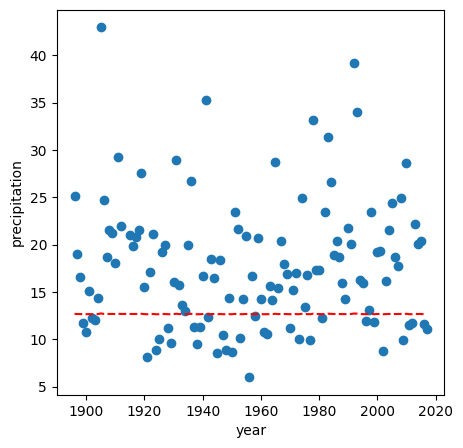

In [54]:
import numpy as np

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_mean_precipitation['year'], df_mean_precipitation['precipitation'])

ax.set_xlabel('year')
ax.set_ylabel('precipitation')

# Add a second-order polynomial best-fit curve using NumPy
z = np.polyfit(df_mean_precipitation['year'], df_mean_precipitation['precipitation'], 1)
p = np.poly1d(z)
# plot type .plot() is a line plot rather than scatterplot
ax.plot(df_mean_precipitation['year'], p(df_mean_precipitation['precipitation']), "r--") # r for red, -- for dashed line


In [68]:
table = []

for month in months:

    
    mean_precipitation = climate[climate['month'] == month]['PRCP'].mean()
    
    if not np.isnan(mean_precipitation):
        row = {'month': month, 'precipitation': mean_precipitation}
        table.append(row)

df_mean_precipitation = pd.DataFrame(table)
df_mean_precipitation

,month,precipitation
0,01,23.711966
1,02,22.303390
2,03,22.557265
3,04,8.616667
4,05,3.804202
5,06,2.125210
6,07,23.752500
7,08,29.233613
8,09,20.482353
9,10,14.197458


Text(0, 0.5, 'precipitation')

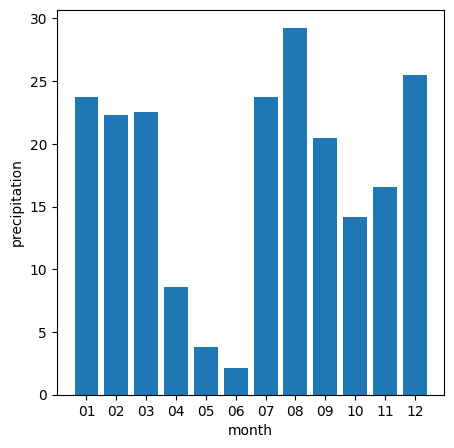

In [69]:
import numpy as np

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.bar(df_mean_precipitation['month'], df_mean_precipitation['precipitation'])

ax.set_xlabel('month')
ax.set_ylabel('precipitation')



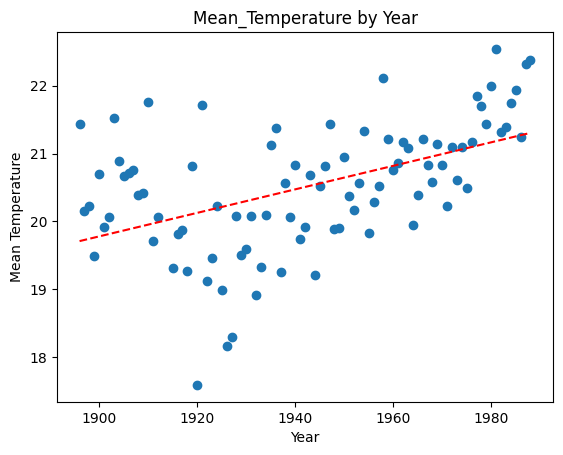

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd
table = []

for year in years:
    
    mean_temperature = climate[climate['YEAR'] == str(year)]['TAVG'].mean()
    
    if not np.isnan(mean_temperature):
        row = {'year': year, 'temperature': mean_temperature}
        table.append(row)

df_mean_temperature = pd.DataFrame(table)


plt.scatter(df_mean_temperature['year'], df_mean_temperature['temperature'])

z = np.polyfit(df_mean_temperature['year'], df_mean_temperature['temperature'], 1)
p = np.poly1d(z)

plt.plot(df_mean_temperature['year'], p(df_mean_temperature['year']), "r--")

# Add labels
plt.title('Mean_Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')

# Show the plot
plt.show()

In [70]:
table = []

for month in months:
    print (month)
    
    mean_temperature = climate[climate['month'] == str(month)]['TAVG'].dropna().mean()
    max_temperature = climate[climate['month'] == str(month)]['TMAX'].dropna().mean()
    min_temperature = climate[climate['month'] == str(month)]['TMIN'].dropna().mean()

    print(mean_temperature)

    if not np.isnan(mean_temperature):
        row = {'month': month, 'mean_temperature': mean_temperature, 'max_temperature': max_temperature, 'min_temperature': min_temperature}
        table.append(row)

df_mean_temperature = pd.DataFrame(table)
df_mean_temperature


01
10.388372093023255
02
12.378651685393258
03
14.97752808988764
04
18.952222222222222
05
23.411363636363635
06
28.513793103448275
07
31.587640449438204
08
30.605813953488376
09
27.601149425287357
10
21.423863636363638
11
14.892941176470586
12
10.898780487804878


,month,mean_temperature,max_temperature,min_temperature
0,01,10.388372,18.468605,2.308140
1,02,12.378652,20.662921,4.085393
2,03,14.977528,23.574157,6.382022
3,04,18.952222,28.245556,9.658889
4,05,23.411364,33.253409,13.572727
5,06,28.513793,38.650000,18.371910
6,07,31.587640,39.912360,23.272222
7,08,30.605814,38.618605,22.585227
8,09,27.601149,36.516092,18.665909
9,10,21.423864,30.743182,12.058427


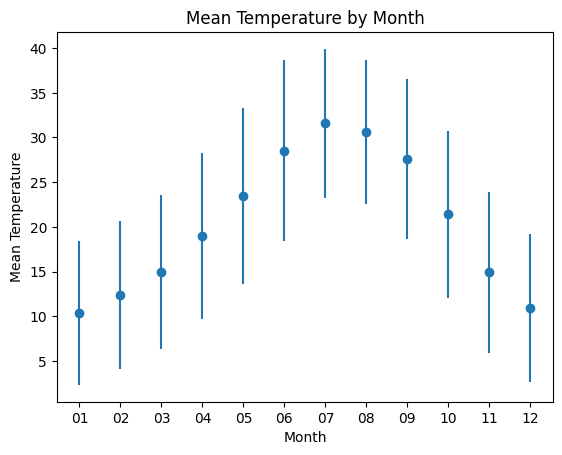

In [71]:
errors = [df_mean_temperature['mean_temperature'] - df_mean_temperature['min_temperature'], df_mean_temperature['max_temperature'] - df_mean_temperature['mean_temperature']]

plt.errorbar(df_mean_temperature['month'], df_mean_temperature['mean_temperature'], yerr=errors, fmt='o')

plt.title('Mean Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Mean Temperature')

plt.show()